In [1]:
train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset\\Train'
validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset\\Validation'
test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset\\Test'

In [3]:
import cv2
import os

resized_images_100_100_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train'
resized_images_100_100_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test'
resized_images_100_100_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation'

CATEGORIES_TRAIN_DIR=os.listdir(train_dir)
CATEGORIES_VALIDATION_DIR=os.listdir(validation_dir)
CATEGORIES_TEST_DIR=os.listdir(test_dir)

for category in CATEGORIES_TRAIN_DIR:
    src_path=os.path.join(train_dir,category)
    dest_path = os.path.join(resized_images_100_100_train_dir,category)
    for src_img_name in os.listdir(src_path):
        try:
            img = cv2.imread(os.path.join(src_path,src_img_name))
            img = cv2.resize(img, (100,100))
            cv2.imwrite(os.path.join(dest_path,src_img_name),img)
        except Exception as e:
            pass

In [4]:
for category in CATEGORIES_VALIDATION_DIR:
    src_path=os.path.join(validation_dir,category)
    dest_path = os.path.join(resized_images_100_100_validation_dir,category)
    for src_img_name in os.listdir(src_path):
        try:
            img = cv2.imread(os.path.join(src_path,src_img_name))
            img = cv2.resize(img, (100,100))
            cv2.imwrite(os.path.join(dest_path,src_img_name),img)
        except Exception as e:
            pass

In [5]:
for category in CATEGORIES_TEST_DIR:
    src_path=os.path.join(test_dir,category)
    dest_path = os.path.join(resized_images_100_100_test_dir,category)
    for src_img_name in os.listdir(src_path):
        try:
            img = cv2.imread(os.path.join(src_path,src_img_name))
            img = cv2.resize(img, (100,100))
            cv2.imwrite(os.path.join(dest_path,src_img_name),img)
        except Exception as e:
            pass

In [7]:
import numpy as np
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint

fruitNetModel=models.Sequential()

fruitNetModel.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)))
fruitNetModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Conv2D(512, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Flatten())
fruitNetModel.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
fruitNetModel.add(layers.Dropout(0.2))
fruitNetModel.add(layers.Dense(3, activation='softmax'))

fruitNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
fruitNetModel.summary()

filepath="FruitNet_Indus_Fruits_3_classes_100_100_1st Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 96, 64)        36928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 94, 94, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 92, 92, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 46, 46, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 46, 46, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 44, 44, 128)       147584    
__________

In [14]:
batch_size=16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_100_100_train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_100_100_validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_100_100_test_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 1200 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [15]:
number_of_training_samples=1200
number_of_validation_samples=120
number_of_test_samples=240

In [16]:
import math

history = fruitNetModel.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=200,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Epoch 1/200
75/75 [==============================] - 26s 343ms/step - loss: 0.9951 - categorical_accuracy: 0.4950 - val_loss: 0.9619 - val_categorical_accuracy: 0.5714
Epoch 2/200
75/75 [==============================] - 17s 228ms/step - loss: 0.7497 - categorical_accuracy: 0.6358 - val_loss: 0.8407 - val_categorical_accuracy: 0.5481
Epoch 3/200
75/75 [==============================] - 17s 220ms/step - loss: 0.6241 - categorical_accuracy: 0.7300 - val_loss: 0.6361 - val_categorical_accuracy: 0.7788
Epoch 4/200
75/75 [==============================] - 17s 220ms/step - loss: 0.6155 - categorical_accuracy: 0.7517 - val_loss: 0.5413 - val_categorical_accuracy: 0.7692
Epoch 5/200
75/75 [==============================] - 17s 220ms/step - loss: 0.5869 - categorical_accuracy: 0.7558 - val_loss: 0.5650 - val_categorical_accuracy: 0.7404
Epoch 6/200
75/75 [==============================] - 17s 220ms/step - loss: 0.5770 - categorical_accuracy: 0.7692 - val_loss: 0.4517 - val_categorical_accuracy:

75/75 [==============================] - 14s 183ms/step - loss: 0.2628 - categorical_accuracy: 0.9092 - val_loss: 0.3586 - val_categorical_accuracy: 0.9018
Epoch 50/200
75/75 [==============================] - 14s 183ms/step - loss: 0.2624 - categorical_accuracy: 0.9058 - val_loss: 0.3623 - val_categorical_accuracy: 0.8558
Epoch 51/200
75/75 [==============================] - 14s 183ms/step - loss: 0.2404 - categorical_accuracy: 0.9092 - val_loss: 0.5308 - val_categorical_accuracy: 0.8654
Epoch 52/200
75/75 [==============================] - 14s 183ms/step - loss: 0.2519 - categorical_accuracy: 0.9208 - val_loss: 0.4049 - val_categorical_accuracy: 0.9135
Epoch 53/200
75/75 [==============================] - 14s 183ms/step - loss: 0.2102 - categorical_accuracy: 0.9200 - val_loss: 0.5003 - val_categorical_accuracy: 0.8846
Epoch 54/200
75/75 [==============================] - 14s 183ms/step - loss: 0.2879 - categorical_accuracy: 0.9108 - val_loss: 0.2450 - val_categorical_accuracy: 0.8942

75/75 [==============================] - 14s 182ms/step - loss: 0.1382 - categorical_accuracy: 0.9525 - val_loss: 0.3381 - val_categorical_accuracy: 0.9375
Epoch 98/200
75/75 [==============================] - 14s 182ms/step - loss: 0.1306 - categorical_accuracy: 0.9583 - val_loss: 0.3481 - val_categorical_accuracy: 0.9038
Epoch 99/200
75/75 [==============================] - 14s 183ms/step - loss: 0.1211 - categorical_accuracy: 0.9642 - val_loss: 0.3577 - val_categorical_accuracy: 0.9135
Epoch 100/200
75/75 [==============================] - 14s 183ms/step - loss: 0.1610 - categorical_accuracy: 0.9442 - val_loss: 0.3929 - val_categorical_accuracy: 0.8942
Epoch 101/200
75/75 [==============================] - 14s 183ms/step - loss: 0.1242 - categorical_accuracy: 0.9600 - val_loss: 0.3482 - val_categorical_accuracy: 0.9327
Epoch 102/200
75/75 [==============================] - 14s 183ms/step - loss: 0.1193 - categorical_accuracy: 0.9625 - val_loss: 0.3540 - val_categorical_accuracy: 0.9

75/75 [==============================] - 14s 183ms/step - loss: 0.0807 - categorical_accuracy: 0.9700 - val_loss: 0.3229 - val_categorical_accuracy: 0.9196
Epoch 146/200
75/75 [==============================] - 14s 183ms/step - loss: 0.1039 - categorical_accuracy: 0.9733 - val_loss: 0.3045 - val_categorical_accuracy: 0.9038
Epoch 147/200
75/75 [==============================] - 14s 183ms/step - loss: 0.0895 - categorical_accuracy: 0.9733 - val_loss: 0.3251 - val_categorical_accuracy: 0.9423
Epoch 148/200
75/75 [==============================] - 14s 183ms/step - loss: 0.0688 - categorical_accuracy: 0.9792 - val_loss: 0.5075 - val_categorical_accuracy: 0.9231
Epoch 149/200
75/75 [==============================] - 14s 183ms/step - loss: 0.1058 - categorical_accuracy: 0.9642 - val_loss: 0.4157 - val_categorical_accuracy: 0.9423
Epoch 150/200
75/75 [==============================] - 14s 183ms/step - loss: 0.0952 - categorical_accuracy: 0.9692 - val_loss: 0.2912 - val_categorical_accuracy: 0

75/75 [==============================] - 14s 184ms/step - loss: 0.0498 - categorical_accuracy: 0.9875 - val_loss: 0.2933 - val_categorical_accuracy: 0.9286
Epoch 194/200
75/75 [==============================] - 14s 184ms/step - loss: 0.0480 - categorical_accuracy: 0.9917 - val_loss: 0.3100 - val_categorical_accuracy: 0.9327
Epoch 195/200
75/75 [==============================] - 14s 184ms/step - loss: 0.0745 - categorical_accuracy: 0.9808 - val_loss: 0.3381 - val_categorical_accuracy: 0.9327
Epoch 196/200
75/75 [==============================] - 14s 184ms/step - loss: 0.0894 - categorical_accuracy: 0.9725 - val_loss: 0.3454 - val_categorical_accuracy: 0.9327
Epoch 197/200
75/75 [==============================] - 14s 184ms/step - loss: 0.0841 - categorical_accuracy: 0.9767 - val_loss: 0.3666 - val_categorical_accuracy: 0.9327
Epoch 198/200
75/75 [==============================] - 14s 184ms/step - loss: 0.0700 - categorical_accuracy: 0.9800 - val_loss: 0.3161 - val_categorical_accuracy: 0

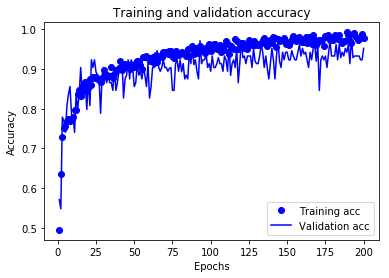

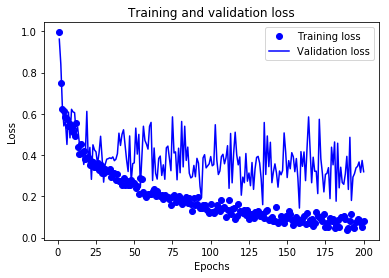

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
from tensorflow.python.keras.models import load_model

best_model = load_model('FruitNet_Indus_Fruits_3_classes_100_100_1st Experiment.h5')

In [19]:
from tensorflow.python.keras.models import load_model

steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_generator, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

15/15 [==============================] - 1s 70ms/step - loss: 0.2363 - categorical_accuracy: 0.9458
Test-set accuracy: 94.58%


In [20]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\orange')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')

test_data = []
test_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (240, 100, 100, 3)
Total number of labels: (240, 1)


In [21]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=8)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

240/240 [==============================] - 1s 5ms/sample - loss: 0.2363 - categorical_accuracy: 0.9458
Loss on test set:  0.23633047388866543
Accuracy on test set:  0.9458333


In [22]:
# Get predictions
preds = best_model.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(240,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

240/240 [==============================] - 1s 4ms/sample
(240, 1)
(240, 1)


<Figure size 432x288 with 0 Axes>

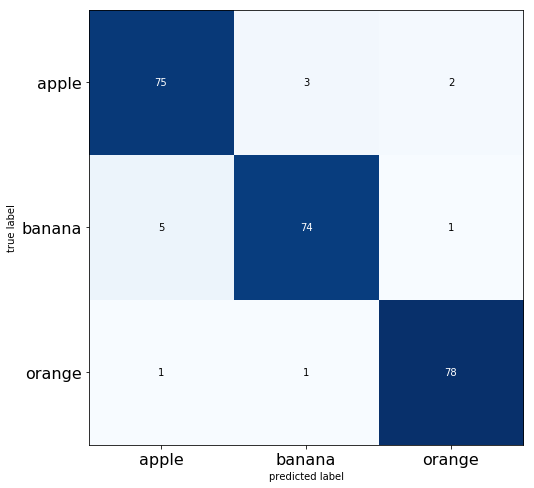

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(3), ['apple', 'banana','orange'], fontsize=16)
plt.yticks(range(3), ['apple', 'banana','orange'], fontsize=16)
plt.show()